# **Isomorphism**

In [2]:
import networkx as nx

### What's isomorphism? Why is it interesting?

As unlabeled graphs can have multiple representations, two graphs are isomorphic if they have the same number of edges, vertices, and same edges connectivity. Let's see an example of two isomorphic graphs, 

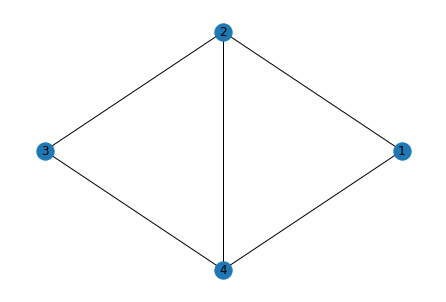

In [24]:
G1 = nx.Graph([(1, 2), (2, 3), (3, 4), (4, 1), (2,4)])
nx.draw_circular(G1, with_labels = True)

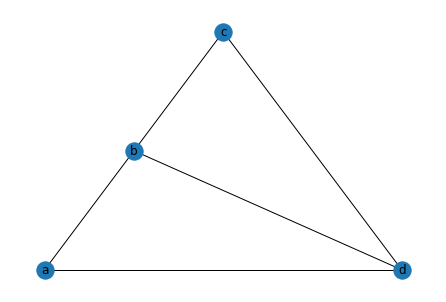

In [25]:
G2 = nx.Graph([("a","b"), ("b", "c"), ("c", "d"), ("d", "a"), ("b", "d")])
nx.draw_planar(G2, with_labels = True)

This graphs are isomorphic. 

In [26]:
nx.is_isomorphic(G1, G2)

True

### **Formal definition**

G and H are isomorphic if we can establish a bijection between the vertex sets of G and H. 

$${\displaystyle f\colon V(G)\to V(H)}$$
such as if $$(v, w) \in E(G) \iff (f(v), f(w)) \in E(H)$$


To formally prove that 2 graphs are isomorphic we need to find the bijection between the vertex set. For the previous example that would be: 

f(1) = 'a'

f(2) = 'b'

f(3) = 'c'

f(4) = 'd'

For small examples, isomorphism may seem easy. But it isn't a simple problem. In fact, isomorphism is part of the problems known as NP. This means that we don't know any algorithm that runs in polynomial time.

### TODO: add applications 

Let's see why this is such a big problem  
For two graphs G and H of n nodes, there are n! bijections function possible. Checking every combination is not a feasible option for bigger graphs. 

 **Naive Approach**

There are some initial properties that we can check to decide whether it's possible to have an isomorphism
- G and H have the same amount of nodes and edges 
- The degree sequence for G and H are the same

These are necessary conditions but don't guarantee that 2 graphs are isomorphic. Let's see a small example:

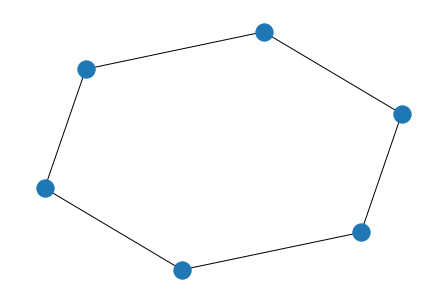

In [21]:
G = nx.cycle_graph(6)
nx.draw(G)

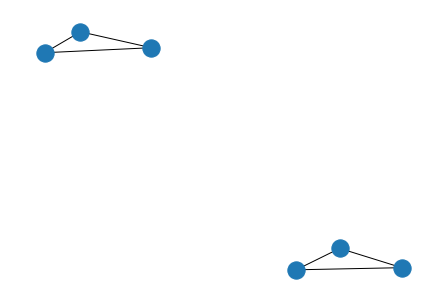

In [25]:
D = nx.union(nx.cycle_graph(3), nx.cycle_graph(3), rename = ("s","d"))
nx.draw(D)

In [26]:
nx.faster_could_be_isomorphic(G, D)

True

These graphs are clearly not isomorphic but they have the same degree secuence. 

Another property we can check for is: 
- Same number of cycles of a particular length, for example, triangles. 

In [30]:
nx.fast_could_be_isomorphic(G, D)

False

Checking this new property we can detect that the previous example graphs were not isomorphic. 

We can go one step further and check the number of cliques. 

In [31]:
nx.could_be_isomorphic(G, D)

False

Again we can detect that G and D are not isomorphic

### TODO: add classes of graphs with solution in polynomial time

**Advanced Algorithms**

**vf2**

## Todo: State of the art 